# CSX46 - Class Session 9 - similarity and hierarchical clustering

In this class session we are going to hierachically cluster (based on Sørensen-Dice similarity) vertices in a directed graph from a landmark paper on human gene regulation (Neph et al., Cell, volume 150, pages 1274-1286, 2012; see PDF on Canvas)

Using Pandas `read_csv`, read in the file `neph_gene_network.txt`, which has two columns of text (first column is the regulator gene, second column is the target gene), into a data frame. The file has no header and is tab-delimited.  Assign the column names of the dataframe to be `regulator` and `target`, respectively.

For this notebook, we will need the python packages `pandas`, `igraph`, `numpy`, `matplotlib.pyplot`, `scipy.cluster.hierarchy`, and `scipy.spatial.distance`.

In [ ]:
!pip install python-igraph
import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
import scipy.spatial.distance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 39.7 MB/s eta 0:00:00


Download the file `neph_gene_network.txt` from the S3 bucket at URL `https://csx46.s3-us-west-2.amazonaws.com/neph_gene_network.txt`

In [ ]:
!curl https://csx46.s3-us-west-2.amazonaws.com/neph_gene_network.txt > neph_gene_network.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  522k  100  522k    0     0  1078k      0 --:--:-- --:--:-- --:--:-- 1078k


Using `pd.read_csv`, read the file `neph_gene_network.txt`; name the two columns of the resulting data frame, `regulator` and `target`.

In [ ]:
edge_list_neph = pd.read_csv("neph_gene_network.txt",
                              sep="\t",
                              names=["regulator","target"])

Load the edge-list data into an undirected `igraph.Graph` object `neph_graph`, using `igraph.Graph.TupleList`. As always, sprint the graph summary using `igraph.Graph.summary`.

In [ ]:
neph_graph = igraph.Graph.TupleList(edge_list_neph.values.tolist(), directed=False)
neph_graph.summary()

'IGRAPH UN-- 538 47945 -- \n+ attr: name (v)'

Using the igraph `Graph.similarity_dice()` method, compute a similarity matrix and assign it to variable `S`. Don't forget to specify `loops=False` in the call to `similarity_dice`!

In [ ]:
S = neph_graph.similarity_dice(loops=False)

Using the `numpy.matrix` constructor, compute a distance matrix `1-S` and assign to object `D`. What is the shape of `D`?

In [ ]:
D = 1 - np.matrix(S)
print(D.shape)

(538, 538)


Compute the expected length of the upper triangle of the matrix `D`, if we were to convert it to a vector

In [ ]:
d = D.shape[0]
int(d*(d-1)/2)

144453

Use `scipy.spatial.distance.squareform` to make a vector-form distance vector from the square-form distance matrix `D`; call the resulting object `vD`. What is the shape of `vD`?

In [ ]:
vD = scipy.spatial.distance.squareform(D)
print(vD.shape)

(144453,)


Using `scipy.cluster.hierarchy.linkage` on `vD` (with `method="average")`, perform hierarchical agglomerative clustering.  Assign the resulting object to variable `hc`. What is the type of `hc`?  What is its shape?  

In [ ]:
hc = scipy.cluster.hierarchy.linkage(vD, method="average")
print(type(hc))
print(hc.shape)
print(pd.DataFrame(hc).head())

<class 'numpy.ndarray'>
(537, 4)
      0      1         2    3
0  10.0   11.0  0.020179  2.0
1  64.0   66.0  0.020367  2.0
2  65.0   67.0  0.022460  2.0
3   9.0  538.0  0.025672  3.0
4  74.0   75.0  0.029817  2.0


Plot a dendrogram using `scipy.cluster.hierarchy.dendrogram`

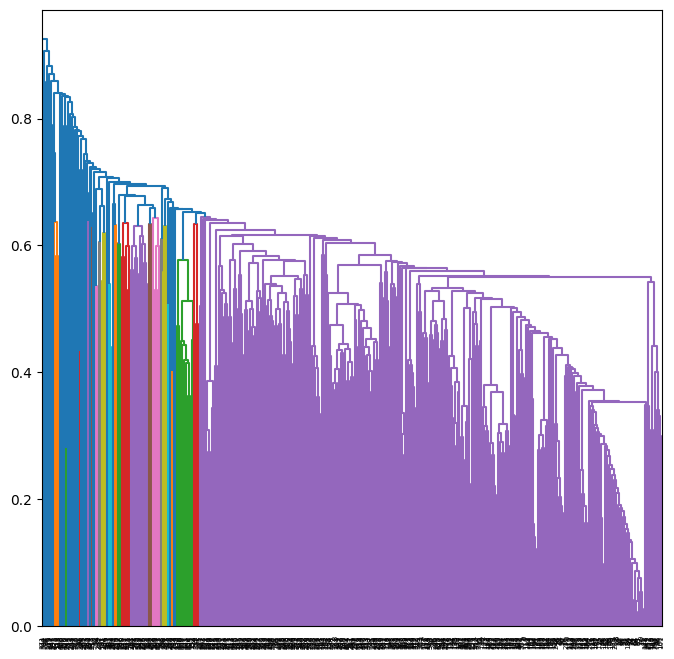

In [ ]:
plt.figure()
fig = plt.gcf()
fig.set_size_inches(8, 8)
res = scipy.cluster.hierarchy.dendrogram(hc)
plt.show()

Use `scipy.cluster.hierarchy.fcluster` to get clusters from cutting the dendrogram at 0.65. Store the resulting array as variable `clusters`.

In [ ]:
clusters = scipy.cluster.hierarchy.fcluster(hc, 0.65, 'distance')

What are the type and shape of `clusters`?

In [ ]:
print(type(clusters))
clusters.shape

<class 'numpy.ndarray'>


(538,)

How many clusters are there if we cut the dendrogram at distance of 0.65? Hint: try `numpy.unique` on the `clusters` object.

In [ ]:
len(np.unique(clusters))

60